**ПРЕДСКАЗАНИЕ ТЕМПЕРАТУРЫ ВОЗДУХА**
---

В этом проекте мы попытаемся предсказать температуру воздуха. Для этого будем использовать набор данных о погоде **"Jena climate"**, записанный на гидрометеорологической станции в институте биогеохимии Макса Планка в Йене, Германия. Он содержит замеры с 2009 по 2016 год, записанные через каждые 10 минут. Набор данных состоит из 14 категорий:
*   **Date Time, 10 minutes** - дата и время замера;
*   **Pressure, p (mbar)** - атмосферное давление;
*   **Temperature, T (degC)** - температура в градусах Цельсия;
*   **Temperature in Kelvin, Tpot (K)** - температура в Кельвинах;
*   **Temperature (dew point), Tdew (degC)** - температура в градусах Цельсия относительно влажности;
*   **Relative Humidity, rh (%)** - относительная влажность воздуха;
*   **Saturation vapor pressure, VPmax (mbar)** - давление насыщенного пара;
*   **Vapor pressure, VPact (mbar)** - давление пара;
*   **Vapor pressure deficit, VPdef (mbar)** - дефицит давления пара;
*   **Specific humidity, sh (g/kg)** - удельная влажность;
*   **Water vapor concentration, H2OC (mmol/mol)** - концентрация водяного пара;
*   **Airtight, rho (g/m^3)** - плотность воздуха;
*   **Wind speed, wv (m/s)** - скорость ветра;
*   **Maximum wind speed, max. wv (m/s)** - максимальная скорость ветра;
*   **Wind direction in degrees, wd (deg)** - направление ветра.

Загружаем данные в Google Colaboratory.

In [1]:
# ----------------------------------------------
#           ***  MOUNT DRIVE  ***
from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/My Drive/Mount.txt', 'r') as file:
    print(file.read())
# ==============================================

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mount successful!


Импортируем необъодимые библиотеки и фреймворки.

In [2]:
# ----------------------------------------------
#         ***  IMPORTS PROJECT  ***
from os import listdir, mkdir 
from os.path import isfile, join, exists
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
sns.set(style='whitegrid') 

import tensorflow as tf
from tensorflow import keras
# ==============================================

Загружаем набор данных.

In [3]:
# ----------------------------------------------
#            ***  DIRECTORY  ***
base_dir = '/content/drive/My Drive/'
dataset_dir = join(base_dir, 'Datasets', 'weather')
file_path = join(dataset_dir, 'climate.csv')
# ==============================================

Посмотрим как представлены данные.

In [4]:
# data = pd.read_csv(file_path, parse_dates=['Date Time'])
data = pd.read_csv(file_path)
data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


Набор данных состоит из колонки даты и времени, 14 колонок показателей погоды и 420551 замеров

In [6]:
data.shape

(420551, 15)

Проверим наш датасет на наличие нулей, пропусков и дубликатов.

In [7]:
data.isnull().sum()

Date Time          0
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

In [8]:
data.isna().sum()

Date Time          0
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

Как можно заметить нулей и пропусков нет, однако pandas находит много дубликатов. При детальном рассмотрении можно увидеть, что это не дубликаты, а очень похожие друг на друга замеры. Возможно, это свзяано с тем, что данные записываются через каждые 10 минут, и поэтому не "успевают" сильно отличаться друг от друга.

In [9]:
data.loc[data.duplicated()]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
78766,01.07.2010 00:10:00,992.06,17.87,291.69,14.06,78.40,20.50,16.07,4.43,10.14,16.20,1180.21,0.31,0.56,51.11
78767,01.07.2010 00:20:00,992.02,17.82,291.65,14.03,78.50,20.44,16.04,4.39,10.12,16.17,1180.38,0.23,0.48,52.64
78768,01.07.2010 00:30:00,992.04,17.92,291.75,14.09,78.30,20.57,16.10,4.46,10.16,16.23,1179.97,0.18,0.40,22.10
78769,01.07.2010 00:40:00,991.96,17.82,291.65,14.02,78.40,20.44,16.02,4.41,10.11,16.15,1180.32,0.19,0.40,354.80
78770,01.07.2010 00:50:00,991.90,17.54,291.38,13.96,79.50,20.08,15.96,4.12,10.07,16.10,1181.41,0.24,0.98,21.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274743,21.03.2014 16:40:00,980.50,18.62,293.43,4.58,39.45,21.49,8.48,13.01,5.40,8.65,1166.81,8.79,13.49,213.40
274744,21.03.2014 16:50:00,980.52,18.30,293.10,4.67,40.48,21.07,8.53,12.54,5.43,8.70,1168.09,7.98,12.33,215.00
274745,21.03.2014 17:00:00,980.74,18.15,292.93,4.79,41.22,20.87,8.60,12.27,5.47,8.77,1168.92,5.35,8.81,215.70
274746,21.03.2014 17:10:00,980.97,18.01,292.77,4.88,41.85,20.69,8.66,12.03,5.51,8.82,1169.73,3.37,5.88,219.40


Взглянем на статистическое описание данных.

In [10]:
data.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000,420551.000000
mean,989.212776,9.450147,283.492743,4.955854,76.008259,13.576251,9.533756,4.042412,6.022408,9.640223,1216.062748,1.702224,3.056555,174.743738
std,8.358481,8.423365,8.504471,6.730674,16.476175,7.739020,4.184164,4.896851,2.656139,4.235395,39.975208,65.446714,69.016932,86.681693
min,913.600000,-23.010000,250.600000,-25.010000,12.950000,0.950000,0.790000,0.000000,0.500000,0.800000,1059.450000,-9999.000000,-9999.000000,0.000000
25%,984.200000,3.360000,277.430000,0.240000,65.210000,7.780000,6.210000,0.870000,3.920000,6.290000,1187.490000,0.990000,1.760000,124.900000
50%,989.580000,9.420000,283.470000,5.220000,79.300000,11.820000,8.860000,2.190000,5.590000,8.960000,1213.790000,1.760000,2.960000,198.100000
75%,994.720000,15.470000,289.530000,10.070000,89.400000,17.600000,12.350000,5.300000,7.800000,12.490000,1242.770000,2.860000,4.740000,234.100000
max,1015.350000,37.280000,311.340000,23.110000,100.000000,63.770000,28.320000,46.010000,18.130000,28.820000,1393.540000,28.490000,23.500000,360.000000


Обратим внимание, что в колонках скорость и максимальная скрость ветра указаны отрицательные значения. А скорость не может принимать отрицательное значение, и для направления ветра есть отдельная колонка. Возможно, это связано с ошибкой переполнения датчика скорости ветра.

In [11]:
print('Отрицательная скорость ветра:\n', data.loc[data['wv (m/s)'] < 0, 'wv (m/s)'])
print('\nОтрицательная максимальная скорость ветра:\n', data.loc[data['max. wv (m/s)'] < 0, 'max. wv (m/s)'])

Отрицательная скорость ветра:
 343578   -9999.0
343579   -9999.0
343580   -9999.0
343581   -9999.0
343582   -9999.0
343583   -9999.0
343584   -9999.0
343585   -9999.0
343586   -9999.0
343587   -9999.0
343588   -9999.0
343589   -9999.0
343590   -9999.0
343591   -9999.0
343592   -9999.0
343593   -9999.0
343594   -9999.0
343595   -9999.0
Name: wv (m/s), dtype: float64

Отрицательная максимальная скорость ветра:
 343577   -9999.0
343578   -9999.0
343579   -9999.0
343580   -9999.0
343581   -9999.0
343582   -9999.0
343583   -9999.0
343584   -9999.0
343585   -9999.0
343586   -9999.0
343587   -9999.0
343588   -9999.0
343589   -9999.0
343590   -9999.0
343591   -9999.0
343592   -9999.0
343593   -9999.0
343594   -9999.0
343595   -9999.0
343596   -9999.0
Name: max. wv (m/s), dtype: float64


Найдём медианные значения колонок скорости ветра, чтобы заменить отрицательные значения.

In [12]:
wind_median = data['wv (m/s)'].median(axis=0)
print('Скорость ветра медиана:', wind_median, 'm/s')
max_wind_median = data['max. wv (m/s)'].median(axis=0)
print('Максимальная скорость ветра медиана:', max_wind_median, 'm/s')

Скорость ветра медиана: 1.76 m/s
Максимальная скорость ветра медиана: 2.96 m/s


Заменим отрицательные значения скоростей на медианные.

In [13]:
data.loc[data['wv (m/s)'] < 0, 'wv (m/s)'] = wind_median
data.loc[data['max. wv (m/s)'] < 0, 'max. wv (m/s)'] = max_wind_median

Построим графики всех показателей.

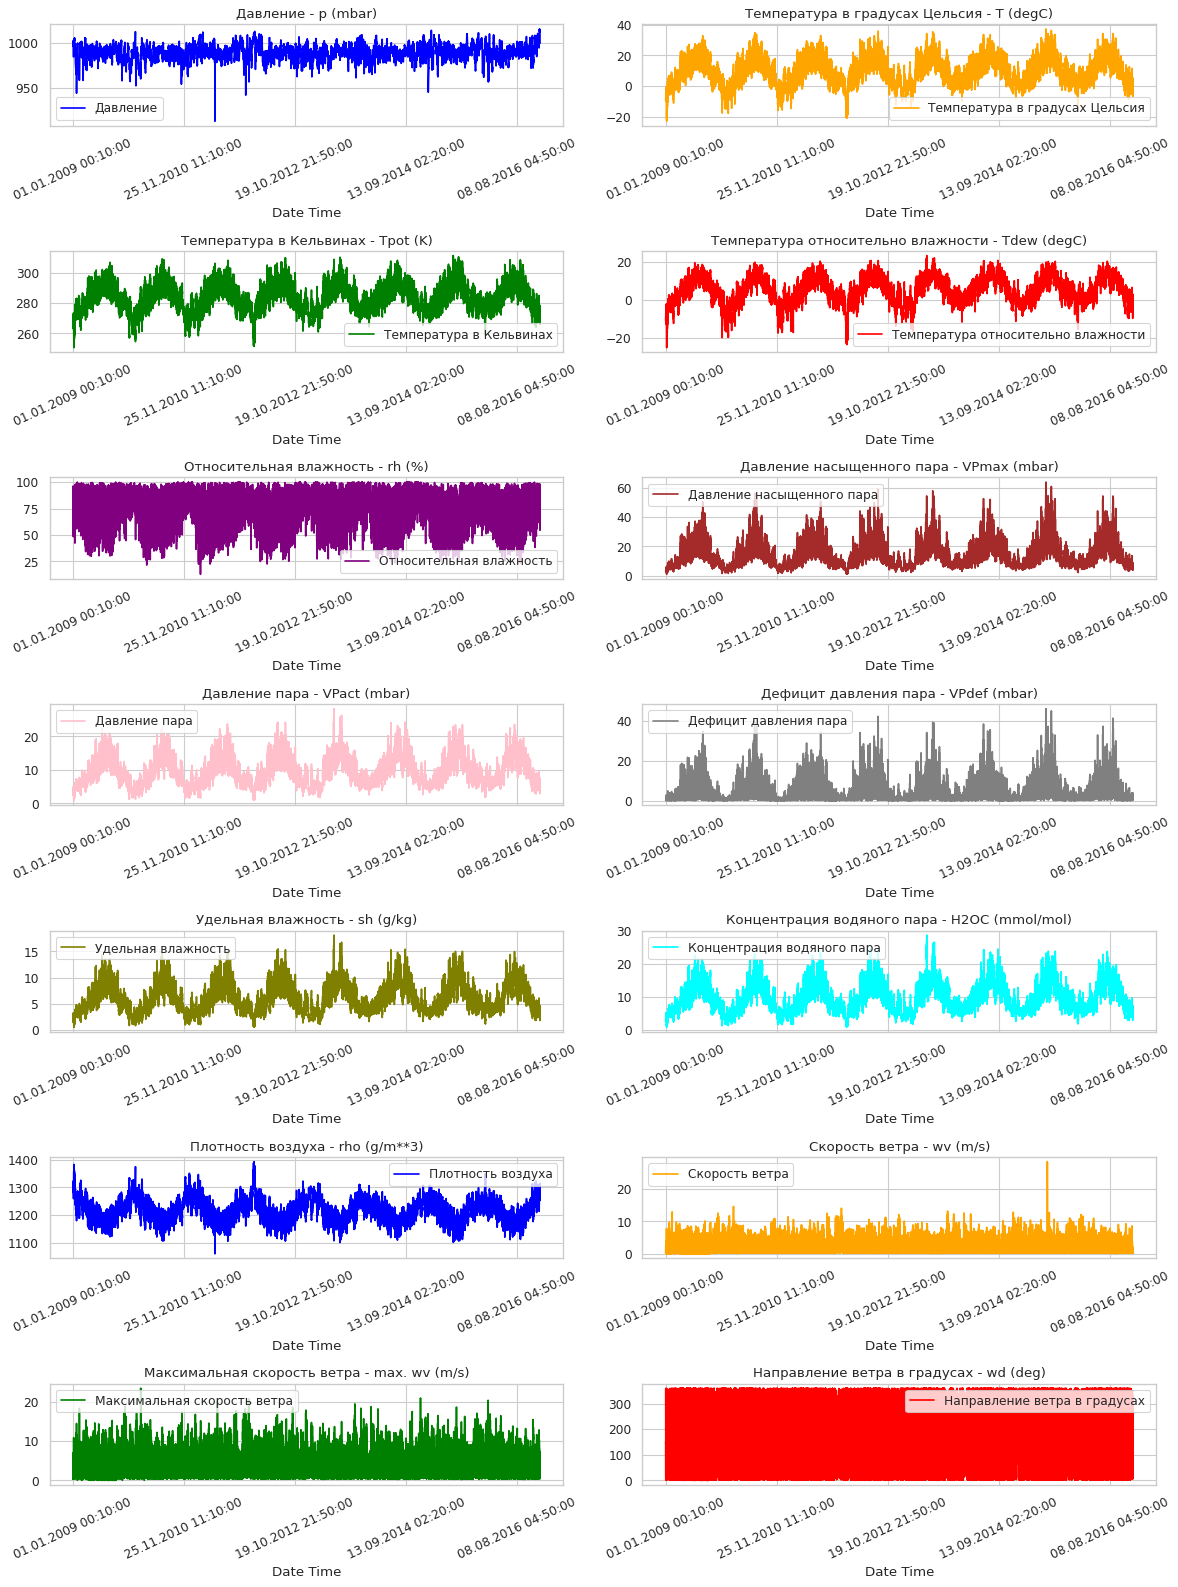

In [14]:
titles = ["Давление", "Температура в градусах Цельсия", "Температура в Кельвинах", "Температура относительно влажности", 
          "Относительная влажность", "Давление насыщенного пара", "Давление пара", "Дефицит давления пара", "Удельная влажность", 
          "Концентрация водяного пара", "Плотность воздуха", "Скорость ветра", "Максимальная скорость ветра", "Направление ветра в градусах"]

feature_keys = ["p (mbar)", "T (degC)", "Tpot (K)", "Tdew (degC)", "rh (%)", "VPmax (mbar)", "VPact (mbar)", "VPdef (mbar)", "sh (g/kg)", "H2OC (mmol/mol)",
                "rho (g/m**3)", "wv (m/s)", "max. wv (m/s)", "wd (deg)"]

colors = ["blue", "orange", "green", "red", "purple", "brown", "pink", "gray", "olive", "cyan"]

fig, axes = plt.subplots(
    nrows=7, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k")

for i in range(len(feature_keys)):
    key = feature_keys[i]
    c = colors[i % (len(colors))]
    t_data = data[key]
    t_data.index = data["Date Time"]
    ax = t_data.plot(
        ax=axes[i // 2, i % 2],
        color=c,
        title="{} - {}".format(titles[i], key),
        rot=25,
    )
    ax.legend([titles[i]])
plt.tight_layout()

Посмотрим на корреляцию категорий между собой.

In [15]:
corr_matrix = data.corr()
corr_matrix["T (degC)"].sort_values(ascending=False)

T (degC)           1.000000
Tpot (K)           0.996827
VPmax (mbar)       0.951113
Tdew (degC)        0.895708
VPact (mbar)       0.867673
H2OC (mmol/mol)    0.867177
sh (g/kg)          0.866755
VPdef (mbar)       0.761744
max. wv (m/s)      0.125129
wv (m/s)           0.088422
wd (deg)           0.038732
p (mbar)          -0.045375
rh (%)            -0.572416
rho (g/m**3)      -0.963410
Name: T (degC), dtype: float64

"Температура в Кельвинах" и "температура в градусах Цельсия относительно влажности" сильно коррелируют с температурой в градусах Цельсия, потому что они расчитыватся с помощью неё. Плотность воздуха, влажность и давление связаны с температурой физически. Только скорость и направление ветра очень слабо влияют на температуру.

<Figure size 864x864 with 0 Axes>

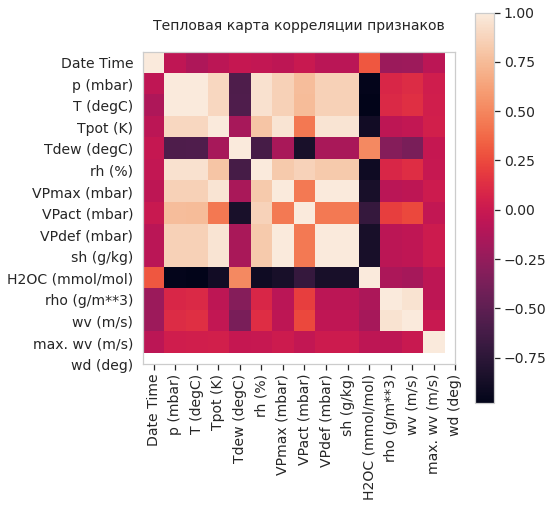

In [16]:
plt.figure(figsize=(12, 12))
plt.matshow(corr_matrix)
plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
plt.gca().xaxis.tick_bottom()
plt.yticks(range(data.shape[1]), data.columns, fontsize=14)
plt.grid(False)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title("Тепловая карта корреляции признаков", fontsize=14)
plt.show()

Далее мы будем рассматривать только температуру в градусах Цельсия, без остальных показателей. И попытаемся предсказать температуру в будущем, основываясь только на знании температуры в прошлом.

In [17]:
temperature = data['T (degC)'].values
print(temperature.shape)

(420551,)


Рассчитаем диапазон изменения значений температуры. Он понадобиться нам дальше при расчёте ошибок предсказания в процентном соотношении (MAPE).

In [18]:
t_min = np.min(temperature)
t_max = np.max(temperature)
t_range = np.abs(t_min) + np.abs(t_max)
print('Минимальная температура:', t_min)
print('Максимальная температура:', t_max)
print('Длинна диапазона температур: {0:.2f}'.format(t_range))

Минимальная температура: -23.01
Максимальная температура: 37.28
Длинна диапазона температур: 60.29


Построим график изменения температуры за все восемь лет.

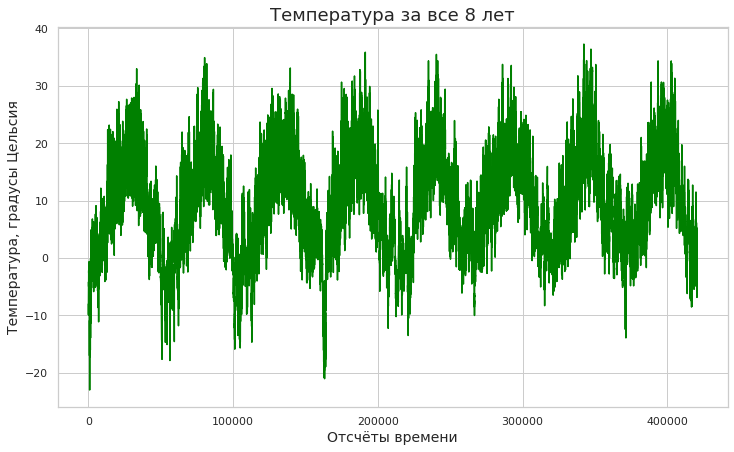

In [112]:
plt.plot(range(temperature.shape[0]), temperature, color="green")
plt.title('Температура за все 8 лет', fontsize=18)
plt.xlabel("Отсчёты времени", fontsize=14)
plt.ylabel("Температура, градусы Цельсия", fontsize=14)
plt.show()

Здесь очень чётко видно сезонное изменение температуры, можно визуально посчитать количество лет.

Замеры начинаются с 01.01.2009 00:10:00, идут с переодичностью в 10 минут и заканчиваются 01.01.2017 00:00:00, как и упоминалось выше.

In [20]:
print('Набор данных начинается с:\t', data['Date Time'].iloc[0])
print('Второй замер:\t', data['Date Time'].iloc[1])
print('Последний замер:\t', data['Date Time'].iloc[-1])

Набор данных начинается с:	 01.01.2009 00:10:00
Второй замер:	 01.01.2009 00:20:00
Последний замер:	 01.01.2017 00:00:00


Как можно заметить ниже, в каждом году разное количество замеров и високосные года непредсказуемо отличаются. Наверное, это связано с ошибкой учёта времени.

In [21]:
year_list = [(0, 52556), (52558, 105260), (105262, 157820), (157822, 210524), (210526, 263083), (263085, 315730), (315732, 368290), (368292, 420549)]
for start, end in year_list:
    print(data['Date Time'].iloc[start], data['Date Time'].iloc[end], ' -> ', end-start)

01.01.2009 00:10:00 31.12.2009 23:50:00  ->  52556
01.01.2010 00:10:00 31.12.2010 23:50:00  ->  52702
01.01.2011 00:10:00 31.12.2011 23:50:00  ->  52558
01.01.2012 00:10:00 31.12.2012 23:50:00  ->  52702
01.01.2013 00:10:00 31.12.2013 23:50:00  ->  52557
01.01.2014 00:10:00 31.12.2014 23:50:00  ->  52645
01.01.2015 00:10:00 31.12.2015 23:50:00  ->  52558
01.01.2016 00:10:00 31.12.2016 23:50:00  ->  52257


Разделим весь набор данных по годам.

In [22]:
year_2009 = data['T (degC)'].iloc[0: 52557].copy()
year_2010 = data['T (degC)'].iloc[52558: 105261].copy()
year_2011 = data['T (degC)'].iloc[105262: 157821].copy()
year_2012 = data['T (degC)'].iloc[157822: 210525].copy()
year_2013 = data['T (degC)'].iloc[210526: 263084].copy()
year_2014 = data['T (degC)'].iloc[263085: 315731].copy()
year_2015 = data['T (degC)'].iloc[315732: 368291].copy()
year_2016 = data['T (degC)'].iloc[368292: 420550].copy()

Если строить график значений темперературы по годам, то мы ничего не увидим. Графики будут перекрывать друг друга. Для этого сгладим кривые.

In [23]:
n = 365*24
ym_2009 = year_2009.rolling(window=n).mean()
ym_2010 = year_2010.rolling(window=n).mean()
ym_2011 = year_2011.rolling(window=n).mean()
ym_2012 = year_2012.rolling(window=n).mean()
ym_2013 = year_2013.rolling(window=n).mean()
ym_2014 = year_2014.rolling(window=n).mean()
ym_2015 = year_2015.rolling(window=n).mean()
ym_2016 = year_2016.rolling(window=n).mean()

Построим на одном графике сглаженные кривые температуры за каждый год.

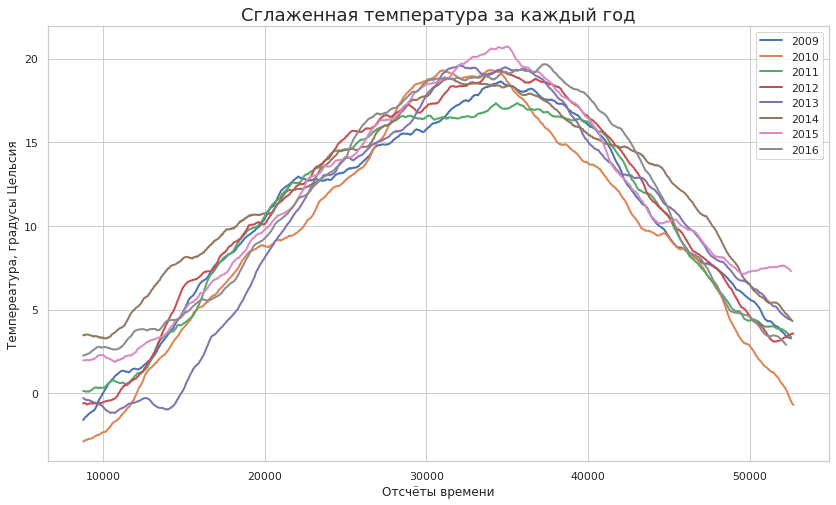

In [24]:
plt.figure(figsize=(14, 8))
plt.plot(range(len(year_2009)), ym_2009, linewidth=2, label="2009")
plt.plot(range(len(year_2010)), ym_2010, linewidth=2, label="2010")
plt.plot(range(len(year_2011)), ym_2011, linewidth=2, label="2011")
plt.plot(range(len(year_2012)), ym_2012, linewidth=2, label="2012")
plt.plot(range(len(year_2013)), ym_2013, linewidth=2, label="2013")
plt.plot(range(len(year_2014)), ym_2014, linewidth=2, label="2014")
plt.plot(range(len(year_2015)), ym_2015, linewidth=2, label="2015")
plt.plot(range(len(year_2016)), ym_2016, linewidth=2, label="2016")
plt.title('Сглаженная температура за каждый год', fontsize=18)
plt.xlabel("Отсчёты времени")
plt.ylabel("Темпереатура, градусы Цельсия")
plt.legend()
plt.show()

Из этого графика можно заметить что каждый год температура изменяется по определённому закону. Зимой температура понижается, а летом повышается. Каждый год не сильно отличается от других. Отличия больше проявляются зимой, меньше летом, а осенью и весной температура из года в год очень похожа.

Распределение значений температуры имеет нормальный вид. В пользу этого утверждения также указывает то, что среднее значение и медиана находтся близко друг к другу.

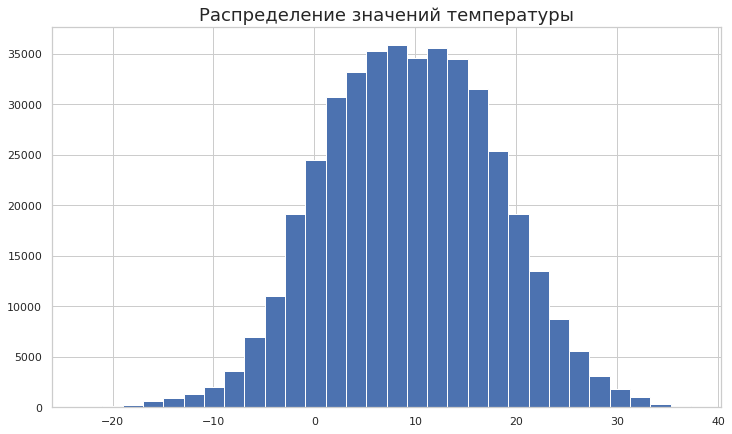

In [25]:
data['T (degC)'].hist(bins=30)
plt.title('Распределение значений температуры', fontsize=18)
plt.show()

Построим графики автокорреляционной функции и частичной автокорреляционной функции температуры. Будем смотреть как связаны значения между собой в течение разного периода времени. Чтобы снизить плотность точек на графике усредним значения температуры за период.

Среднее значение температуры за день в течение года.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1 лаг = 1 дней


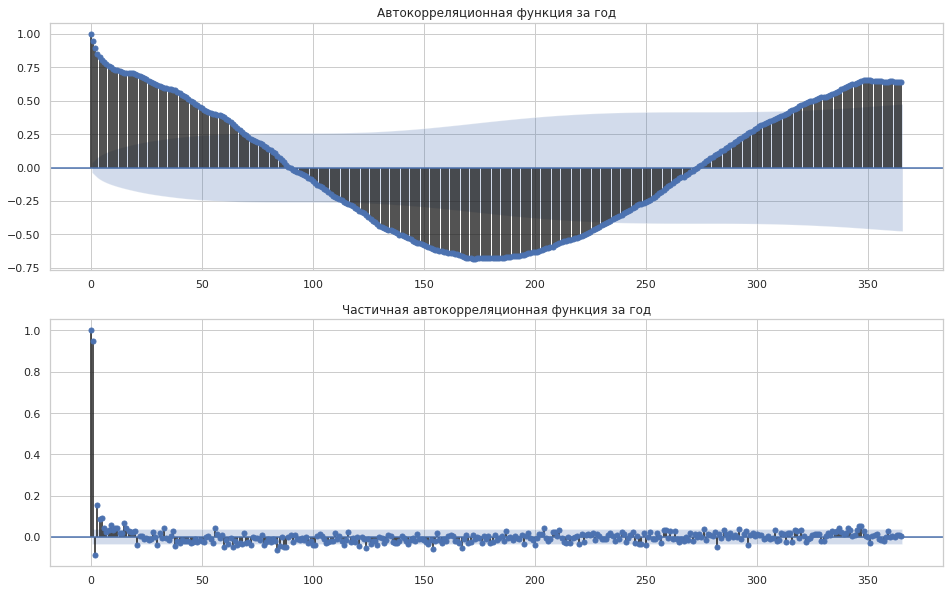

In [26]:
import statsmodels.tsa.api as smt

mean_day = np.reshape(temperature[:temperature.shape[0]-temperature.shape[0]%(24*6)], (-1, 24*6)).mean(axis=1)

plt.figure(figsize=(16, 10))
smt.graphics.plot_acf(mean_day, ax=plt.subplot(2,1,1), title='Автокорреляционная функция за год', lags=365)
smt.graphics.plot_pacf(mean_day, ax=plt.subplot(2,1,2), title='Частичная автокорреляционная функция за год', lags=365)
del mean_day
print('1 лаг = 1 дней')

На графике автокорреляционной функции хорошо видно, что значения очень связаны. Текущее значение очень связано с предыдущим, и так каждое значение. По связи значений также видно сезонные изменения. 
Частичная функция автокорреляции, напротив, показывает что связь значений теряется по мере увеличения расстояния между значениями. Это подтверждает то факт, что сегодняшняя погода очень похожа на вчерашнюю и мало связана, с погодой, которая была неделю назад. В этом мы ещё не раз убедимся ниже.

Среднее значение температуры за каждые шесть часов в течение двух месяцев.

1 лаг = 6 часов


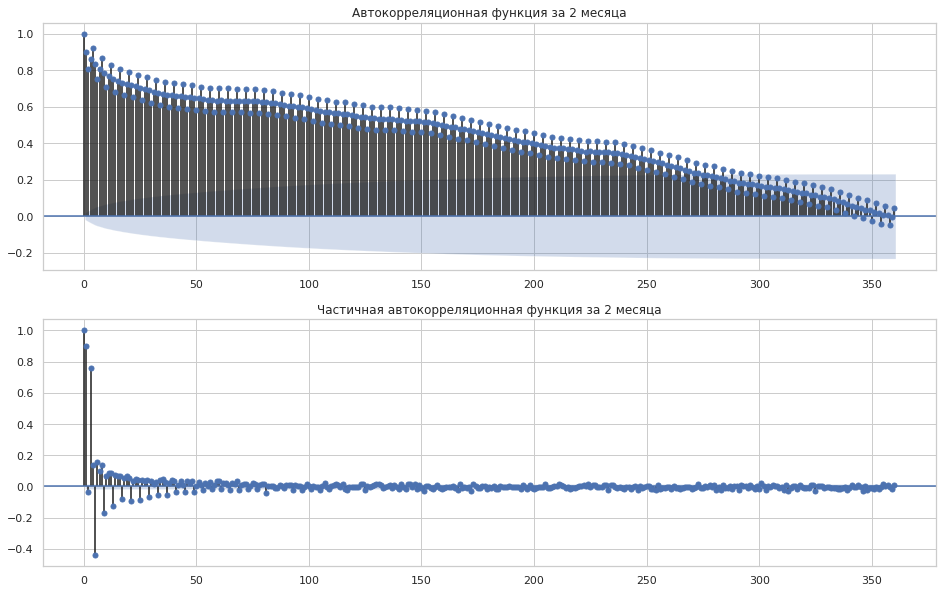

In [27]:
mean_6hour = np.reshape(temperature[:temperature.shape[0]-temperature.shape[0] % (6*6)], (-1, 6*6)).mean(axis=1)

plt.figure(figsize=(16, 10))
smt.graphics.plot_acf(mean_6hour, ax=plt.subplot(2,1,1), title='Автокорреляционная функция за 2 месяца', lags=2*30*6)
smt.graphics.plot_pacf(mean_6hour, ax=plt.subplot(2,1,2), title='Частичная автокорреляционная функция за 2 месяца', lags=2*30*6)
del mean_6hour
print('1 лаг = 6 часов')

Среднее значение температуры каждые двадцать минут в течение трёх дней.

1 лаг = 20 минут


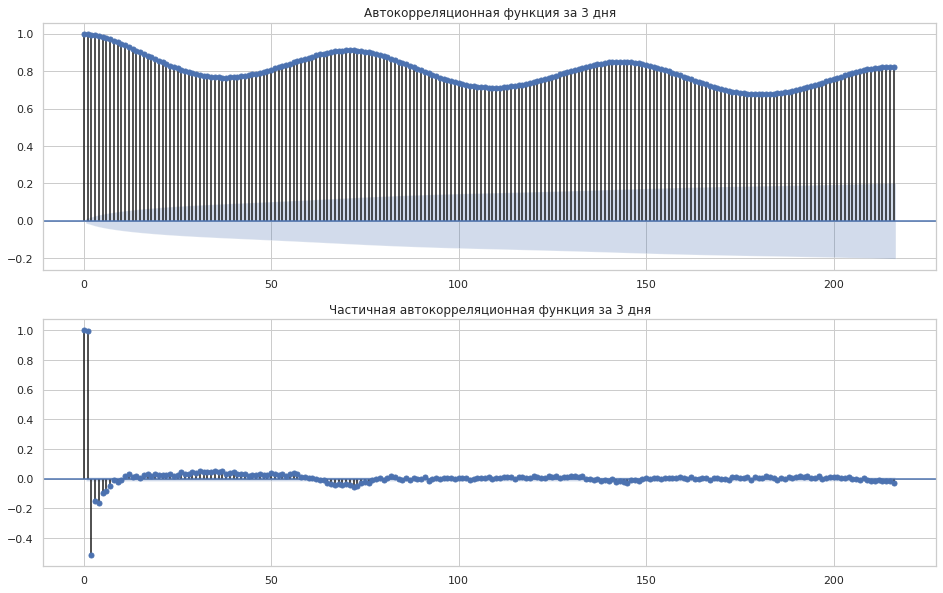

In [28]:
mean_20minutes = np.reshape(temperature[:52558], (-1, 2)).mean(axis=1)

plt.figure(figsize=(16, 10))
smt.graphics.plot_acf(mean_20minutes, ax=plt.subplot(2,1,1), title='Автокорреляционная функция за 3 дня', lags=3*24*3)
smt.graphics.plot_pacf(mean_20minutes, ax=plt.subplot(2,1,2), title='Частичная автокорреляционная функция за 3 дня', lags=3*24*3)
del mean_20minutes
print('1 лаг = 20 минут')

На последних графиках мы видим ту же картину. Текущее значение связано с предыдущим, и связь падает по мере увеличения расстояния между значениями.

**ПОДГОТОВКА ДАННЫХ**

Подготовим значения для обучения моделей. Разделим данные на данные для обучения, и для проверки. Обучение будет происходить на первых шести годах, а проверка - на оставшихся двух годах.

In [29]:
# Вычислим среднее и стандартное отклонение на обучающей выборке.
train_split = 315855 # 6 лет
temperature_mean = temperature[:train_split].mean(axis=0)
temperature_std = temperature[:train_split].std(axis=0)

# Проведём нормализацию всех данных. Для этого из данных вычтим среднее
# и поделим на стандатное отклонение.  
temperature_norm = np.copy(temperature)
temperature_norm = (temperature_norm - temperature_mean) / temperature_std
print('Среднее значение температуры:', temperature_mean)
print('Стандартное отклонение температуры:', temperature_std)

Среднее значение температуры: 9.181944848110682
Стандартное отклонение температуры: 8.53637153868056


Разделим даннные на обучение и проверку.

In [30]:
# объём данных для обучения
train_data = temperature_norm[:train_split]
# объём данных для проверки
test_data = temperature_norm[train_split:]
print('Размер обучающих данных:', train_data.shape)
print('Размер проверочных данных: ', test_data.shape)

Размер обучающих данных: (315855,)
Размер проверочных данных:  (104696,)


Теперь, зная объём данных для обучения и проверки, расчитаем количество образцов в каждой выборке. Каждый замер делался с интервалом в 10 минут, за это время показатели сильно не изменялись. Поэтому использовать много схожих образцов нет смысла, будем использовать замеры за каждый час, то есть каждый шестой замер. Прогноз на будущее будем строить через 12 часов, основываясь на 5 днях в прошлом.

In [31]:
n_features = 1          # количество признаков, только температура
step = 6                # замеры через час
past = 720              # 5 дней в прошлом
future = 72             # 12 часов в будущем
batch_size = 256        # размер подвыборки

# длинна образца
sample_len = int(past/step)
print('Длинна последовательности: {0} / {1} = {2:.2f}'.format(past, step, past/step))
# количество образцов для обучения
n_train_samples = train_split - past + 1

# занимаемое пространство для тестовых образцов
test_space_x = temperature.shape[0] - train_split - future
# занимаемое пространство для тестовых меток
test_space_y = temperature.shape[0] - train_split - past - future
# количество образцов для проверки
n_test_samples = test_space_x - past + 1
n_test_samples = min(n_test_samples, test_space_y)

# Cокращаем количество образцов до деления нацело на размер подвыборки, 
# чтобы алгоритмы ML и DL обучались на одиннаковом количестве данных.
n_train_samples = n_train_samples - n_train_samples % batch_size
n_test_samples = n_test_samples - n_test_samples % batch_size
print('Количество образцов для обучения:', n_train_samples)
print('Количество образцов для проверки:', n_test_samples)

Длинна последовательности: 720 / 6 = 120.00
Количество образцов для обучения: 315136
Количество образцов для проверки: 103680


Разделим данные на образцы и метки для алгоритмов классического машинного обучения.

In [32]:
test_split = train_split + future + past

x_train = np.zeros((n_train_samples, sample_len))
y_train = np.zeros((n_train_samples))
print('Форма обучающего набора:', x_train.shape)
print('Форма меток обучающего набора:', y_train.shape)

x_test = np.zeros((n_test_samples, sample_len))
y_test = np.zeros((n_test_samples)) 
print('Форма проверочного набора:', x_test.shape)
print('Форма меток проверочного набора:', y_test.shape)

for i in range(n_train_samples):
    x_train[i] = temperature_norm[i:i+past:step]
    y_train[i] = temperature_norm[i+past+future]

for i in range(n_test_samples):
    x_test[i] = temperature_norm[train_split+i:train_split+i+past:step]
    y_test[i] = temperature_norm[test_split+i]

Форма обучающего набора: (315136, 120)
Форма меток обучающего набора: (315136,)
Форма проверочного набора: (103680, 120)
Форма меток проверочного набора: (103680,)


Преобразуем форму образцов и меток для алгоритмов глубокого обучения.

In [33]:
x_train_ = np.reshape(x_train, (-1, sample_len, n_features))
y_train_ = np.reshape(y_train, (-1, n_features))
x_test_ = np.reshape(x_test, (-1, sample_len, n_features))
y_test_ = np.reshape(y_test, (-1, n_features))

print('Форма обучающего набора:', x_train_.shape)
print('Форма меток обучающего набора:', y_train_.shape)
print('Форма проверочного набора:', x_test_.shape)
print('Форма меток проверочного набора:', y_test_.shape)

Форма обучающего набора: (315136, 120, 1)
Форма меток обучающего набора: (315136, 1)
Форма проверочного набора: (103680, 120, 1)
Форма меток проверочного набора: (103680, 1)


Для обучения DL моделей нам понадобится генератор данных.

In [34]:
# Генератор данных для keras
class DataGenerator(keras.utils.Sequence):
    def __init__(self, samples, labels, sample_len=None, n_features=1, batch_size=256, shuffle = True):
        self.samples = samples 
        self.labels = labels
        self.sample_len = sample_len
        self.n_features = n_features
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        # вычисляем количество подвыборок за эпоху
        return int(np.floor(self.samples.shape[0] / self.batch_size))

    def __getitem__(self, index):
        # генерируем индексы для подвыборки
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # генерируем данные
        X, y = self.__data_generation(indexes)

        return X, y

    def on_epoch_end(self):
        # обновляем индексы после каждой эпохи
        self.indexes = np.arange(self.samples.shape[0])
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        # генерируем подвыборку
        X = np.empty((self.batch_size, self.sample_len, self.n_features))
        y = np.empty((self.batch_size, self.n_features))

        for i, ID in enumerate(list_IDs_temp):
            # образцы
            X[i,] = self.samples[ID] 

            # метки
            y[i,] = self.labels[ID]

        return X, y

# генератор для обучения моделей
train_generator = DataGenerator(x_train_, y_train_, sample_len=sample_len, n_features=n_features, batch_size=batch_size, shuffle = True)
# генератор для проверки моделей
test_generator = DataGenerator(x_test_, y_test_, sample_len=sample_len, n_features=n_features, batch_size=batch_size, shuffle = True)

**ОБУЧЕНИЕ И ПРОВЕРКА МОДЕЛЕЙ**

Самым простым решением задачи прогноза погоды без превлечения алгоритмов машинного обучения является предположение о том, что завтра в это же время будет такая же погода как сегодня в это время. Подсчитаем среднюю абсолютную ошибку для такого предсказания.

In [35]:
yesterday = (past-future)//step
mae = np.abs(x_test[:, yesterday] - y_test).mean()
print('mae:', mae)
mae *= temperature_std
print('mae = {0:.2f} degC, mape = {1:.02f} %'.format(mae, mae*100/t_range))

mae: 0.3076573662446842
mae = 2.63 degC, mape = 4.36 %


Мы получили среднюю ошибку в 2.63 градуса Цельсия. Далее, с помощью алгоритмов ML и DL нам нужно будет улучшить это базовое решение.

**МОДЕЛИ ГЛУБОКОГО ОБУЧЕНИЯ**

Построим **полносвязную модель** нейронной сети.

Модель будет состоять из одного слоя из 32 нейронов, которые будут связаны с выходным слоем из одного нейрона. Для борьбы с переобучением будем использовать слой dropout. Я пробовал разные архитектуры: увеличивал/уменшал количество нейронов, добавлял скрытй слой, однако это не давало существенного улучшения прогноза. Поэтому приоритет в стророну простоты модели.

In [36]:
# ----------------------------------------------
#          ***  CLEAR SESSION  ***
from tensorflow.keras import backend as K
K.clear_session()
# ==============================================

In [37]:
inputs = keras.layers.Input(shape=(sample_len, n_features))
x = keras.layers.Flatten()(inputs)
x = keras.layers.Dense(32, activation='relu')(x)
x = keras.layers.Dropout(0.2)(x)
outputs = keras.layers.Dense(1)(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 120, 1)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 120)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                3872      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 3,905
Trainable params: 3,905
Non-trainable params: 0
_________________________________________________________________


Визуализируем архитектуру модели.

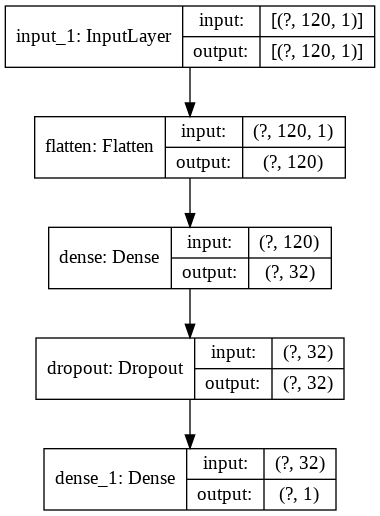

In [38]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file=join(base_dir, 'model_dense.png'))

Обучаем модель.

In [39]:
%%time

# путь сохранения весов модели
save_index = 'dense_23'
path_checkpoint = join(dataset_dir, "model_checkpoint_{}.h5".format(save_index))
# ранняя остановка обучения, если модель не улучшается больше 5 эпох
earlystop_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)
# сохранение весов, если модель улучшилась
modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True)

# обучаем модель 30 эпох
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator,
    callbacks=[earlystop_callback, modelckpt_callback])

Epoch 1/30
1222/1231 [============================>.] - ETA: 0s - loss: 0.2226 - mae: 0.3464
Epoch 00001: val_loss improved from inf to 0.12510, saving model to /content/drive/My Drive/Datasets/weather/model_checkpoint_dense_23.h5
1231/1231 [==============================] - 3s 3ms/step - loss: 0.2220 - mae: 0.3460 - val_loss: 0.1251 - val_mae: 0.2759
Epoch 2/30
1209/1231 [============================>.] - ETA: 0s - loss: 0.1387 - mae: 0.2895
Epoch 00002: val_loss improved from 0.12510 to 0.12171, saving model to /content/drive/My Drive/Datasets/weather/model_checkpoint_dense_23.h5
1231/1231 [==============================] - 3s 3ms/step - loss: 0.1386 - mae: 0.2895 - val_loss: 0.1217 - val_mae: 0.2715
Epoch 3/30
1212/1231 [============================>.] - ETA: 0s - loss: 0.1339 - mae: 0.2841
Epoch 00003: val_loss improved from 0.12171 to 0.11926, saving model to /content/drive/My Drive/Datasets/weather/model_checkpoint_dense_23.h5
1231/1231 [==============================] - 3s 3ms/s

Простроим кривые обучения и проверки по функции потерь, и средней абсолютной ошибке.

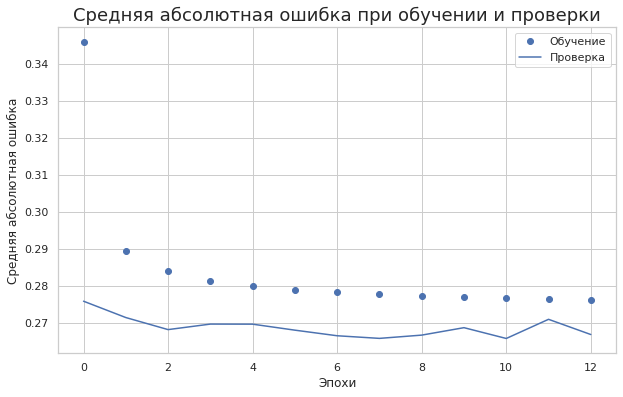

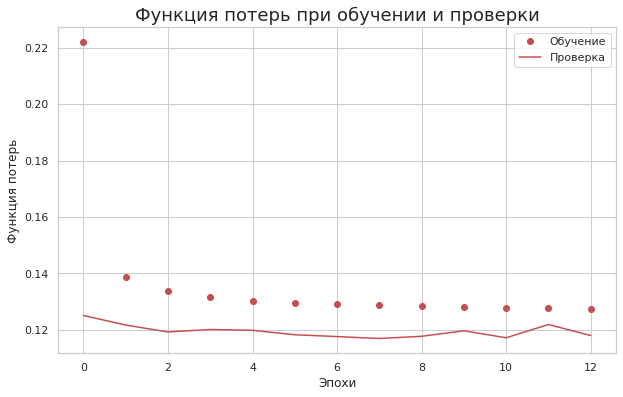

In [40]:
def plot_train_test_loss(history):
    plot_mae = history.history['mae']               # ошибка при обучении
    plot_test_mae = history.history['val_mae']      # ошибка при проверке
    plot_loss = history.history['loss']             # функция потерь при обучении
    plot_test_loss = history.history['val_loss']    # функция потерь при проверке
    epochs = range(len(plot_mae))

    plt.figure(figsize=(10, 6))
    plt.plot(epochs, plot_mae, 'bo', label='Обучение')
    plt.plot(epochs, plot_test_mae, 'b', label='Проверка')
    plt.title('Средняя абсолютная ошибка при обучении и проверки', fontsize=18)
    plt.xlabel("Эпохи")
    plt.ylabel("Средняя абсолютная ошибка")
    plt.legend()

    plt.figure(figsize=(10, 6))
    plt.plot(epochs, plot_loss, 'ro', label='Обучение')
    plt.plot(epochs, plot_test_loss, 'r', label='Проверка')
    plt.title('Функция потерь при обучении и проверки', fontsize=18)
    plt.xlabel("Эпохи")
    plt.ylabel("Функция потерь")
    plt.legend()
    plt.show()

# полносвязная сеть
plot_train_test_loss(history)

Проверим модель на тестовом наборе. Для этого загрузим веса с наименьшим значением фукции потерь.

In [41]:
%%time

# загружаем веса
load_index = 'dense_23'
model.load_weights(join(dataset_dir, "model_checkpoint_{}.h5".format(load_index)))

# расчитаем среднюю абсолютную ошибку 
validation = model.evaluate(test_generator, verbose=1, return_dict=True)
mae = validation['mae']
print('MAE:', mae)
mae *= temperature_std
print('mae = {0:.2f} degC, mape = {1:.02f} %'.format(mae, mae*100/t_range))

405/405 [==============================] - 1s 2ms/step - loss: 0.1170 - mae: 0.2658
MAE: 0.2658484876155853
mae = 2.27 degC, mape = 3.76 %
CPU times: user 898 ms, sys: 81.3 ms, total: 980 ms
Wall time: 922 ms


Мы получили хороший результат, значение среденей абсолютной ошибки 2.27 градуса Цельсия. Это меньше чем мы получили в базовом решении 2.63 градуса Цельсия. Однако разница результатов не очень существенна.

Полносвязная модель воспринимает данные как одну совокупность, не рассматривает как последовательность, то есть не может вытащить информацию о порядке следования. Рекуррентная сеть обладает необходимым свойством. За счёт своей архитектуры она может запоминать что было раньше, и поэтому лучше подходит для решения данной задачи. Построим **модель рекуррентной неронной сети**.

In [42]:
# ----------------------------------------------
#          ***  CLEAR SESSION  ***
K.clear_session()
del model
# ==============================================

Сеть состоит из рекуррентного слоя GRU, после которого идёт полносвязный регрессор. Также для предотвращения переобучения будем использовать dropout. Здесь я тоже пробовал изменять размер выходного пространства рекуррентного слоя, менял слой GRU на LSTM, добавлял ещё рекуррентные слои, но усложнение сети не давало значимого снижения ошибки. Самые лучшие результаты показывала простая сеть, вдобавок, простая сеть быстрее обучается.

In [43]:
inputs = keras.layers.Input(shape=(sample_len, n_features))
gru = keras.layers.GRU(8, dropout=0.2, recurrent_dropout=0.2)(inputs)
outputs = keras.layers.Dense(1)(gru)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 120, 1)]          0         
_________________________________________________________________
gru (GRU)                    (None, 8)                 264       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


Визуализируем архитектуру модели.

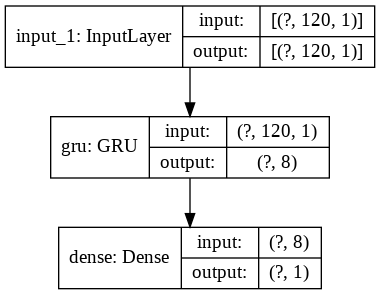

In [44]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file=join(base_dir, 'model_gru.png'))

Обучаем модель.

In [45]:
%%time

# путь сохранения весов модели
save_index = 'gru8_16'
path_checkpoint = join(dataset_dir, "model_checkpoint_{}.h5".format(save_index))
# ранняя остановка обучения, если модель не улучшается больше 5 эпох
earlystop_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)
# сохранение весов, если модель улучшилась
modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True)

# обучаем модель 30 эпох
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator,
    callbacks=[earlystop_callback, modelckpt_callback])

Epoch 1/30
1231/1231 [==============================] - ETA: 0s - loss: 0.2759 - mae: 0.4006
Epoch 00001: val_loss improved from inf to 0.17541, saving model to /content/drive/My Drive/Datasets/weather/model_checkpoint_gru8_16.h5
1231/1231 [==============================] - 107s 87ms/step - loss: 0.2759 - mae: 0.4006 - val_loss: 0.1754 - val_mae: 0.3260
Epoch 2/30
1231/1231 [==============================] - ETA: 0s - loss: 0.1728 - mae: 0.3260
Epoch 00002: val_loss improved from 0.17541 to 0.14336, saving model to /content/drive/My Drive/Datasets/weather/model_checkpoint_gru8_16.h5
1231/1231 [==============================] - 109s 88ms/step - loss: 0.1728 - mae: 0.3260 - val_loss: 0.1434 - val_mae: 0.2937
Epoch 3/30
1231/1231 [==============================] - ETA: 0s - loss: 0.1551 - mae: 0.3088
Epoch 00003: val_loss improved from 0.14336 to 0.13397, saving model to /content/drive/My Drive/Datasets/weather/model_checkpoint_gru8_16.h5
1231/1231 [==============================] - 110s 

Простроим кривые обучения и проверки по функции потерь, и средней абсолютной ошибке.

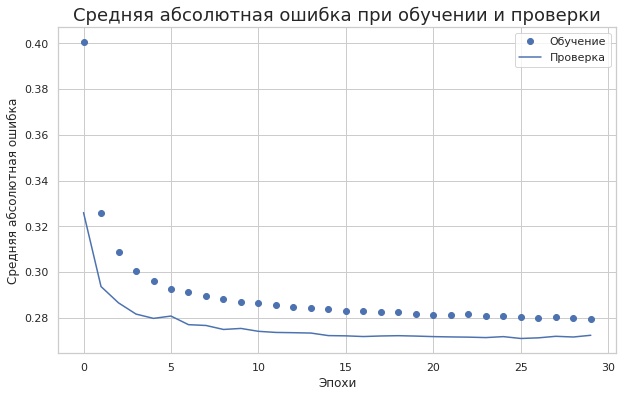

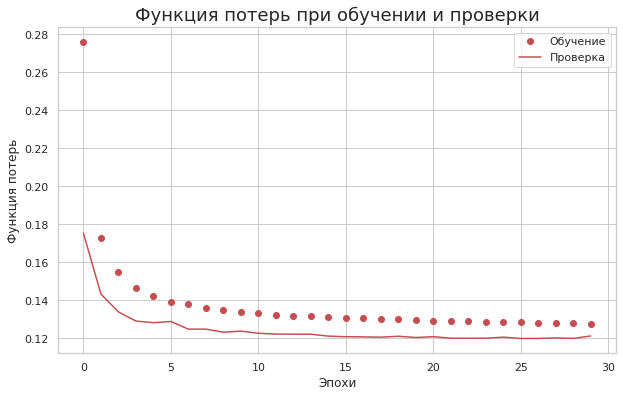

In [46]:
# рекуррентная сеть
plot_train_test_loss(history)

Оценим ошибку модели на тестовом наборе. Для этого загрузим веса с наилучшим показателем фукции потерь.

In [47]:
%%time

# загружаем веса
load_index = 'gru8_16'
model.load_weights(join(dataset_dir, "model_checkpoint_{}.h5".format(load_index)))

# расчитаем среднюю абсолютную ошибку 
validation = model.evaluate(test_generator, verbose=1, return_dict=True)
mae = validation['mae']
print('MAE:', mae)
mae *= temperature_std
print('mae = {0:.2f} degC, mape = {1:.02f} %'.format(mae, mae*100/t_range))

405/405 [==============================] - 6s 14ms/step - loss: 0.1200 - mae: 0.2710
MAE: 0.27097392082214355
mae = 2.31 degC, mape = 3.84 %
CPU times: user 9.63 s, sys: 259 ms, total: 9.89 s
Wall time: 5.83 s


Используя RNN мы получили неплохой результат, значение среденей абсолютной ошибки 2.31 градуса Цельсия. Это меньше чем мы получили в базовом решении (2.63), но больше чем получилось при использовании полносвязной сети (2.27). Усложнение сети не дало снижения ошибки. Небольшое улучшение могла бы дать более точная настройка гиперпараметров и архитектуры сетей. Но изменения в сети, которые я описывал ранее, малая скорость обучения, и незначительные перемены на выходе делают нецелесообразным поиск оптимальных значений.

Также из DL для решения данной задачи можно было бы попробовать одномерную свёрточную сеть. Такая архитектура позволяет извлекать структуру данных. Но я не вижу в этом смысла, так как две предыдущие сети не дали особо значимого результата. Я думаю, что это связано не с архитектурами и гиперпараметрами сети, а с тем что **в прошлом температуры очень мало информации о будущем**. Это мы видели выше на графиках, и также будем наблюдать ниже. 

**МОДЕЛИ КЛАССИЧЕСКОГО МАШИННОГО ОБУЧЕНИЯ**

В этой части проекта мы попытаемся превзойти полученые ранее значения ошибки прогноза. Для этого будем использовать различные алгоритмы ML.

In [48]:
# ----------------------------------------------
#          ***  CLEAR SESSION  ***
K.clear_session()
del model
# ==============================================

In [49]:
%%time

# Ленейная регрессия

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

lin_reg_pred = lin_reg.predict(x_test)
lin_reg_mae = mean_absolute_error(y_test, lin_reg_pred)
print('MAE:', lin_reg_mae)
lin_reg_deg = lin_reg_mae * temperature_std
print('MAE = {0:.2f} degC, mape = {1:.02f} %'.format(lin_reg_deg, lin_reg_deg*100/t_range))

MAE: 0.2696496217319074
MAE = 2.30 degC, mape = 3.82 %
CPU times: user 8.67 s, sys: 561 ms, total: 9.23 s
Wall time: 5.34 s


Линейная регрессия несмотря на свою простоту дала очень хороший результат 2.30 degC. Вдобавок, очень быстрая скорость расчёта.

In [50]:
%%time

from sklearn.linear_model import Ridge

# Гребневая регрессия (Ridge)

model = Ridge(alpha=0.5)
# 
model.fit(x_train, y_train)

model_pred = model.predict(x_test)
model_mae = mean_absolute_error(y_test, model_pred)
print('MAE:', model_mae)
model_deg = model_mae * temperature_std
print('MAE = {0:.2f} degC, mape = {1:.02f} %'.format(model_deg, model_deg*100/t_range))

MAE: 0.2696496944340503
MAE = 2.30 degC, mape = 3.82 %
CPU times: user 803 ms, sys: 286 ms, total: 1.09 s
Wall time: 622 ms


Гребневая регрессия (со штрафом L2) дала такой же результат, как и простая линейная регрессия. Изменение коэффициента штрафов alpha не изменяло результат.

In [51]:
%%time

from sklearn.linear_model import Lasso

# Lasso регрессия

model = Lasso(alpha=0.1)
model.fit(x_train, y_train)

model_pred = model.predict(x_test)
model_mae = mean_absolute_error(y_test, model_pred)
print('MAE:', model_mae)
model_deg = model_mae * temperature_std
print('MAE = {0:.2f} degC, mape = {1:.02f} %'.format(model_deg, model_deg*100/t_range))

MAE: 0.3038080439744019
MAE = 2.59 degC, mape = 4.30 %
CPU times: user 21 s, sys: 614 ms, total: 21.6 s
Wall time: 11.3 s


Lasso регрессия (штраф L1) показала плохой результат 2.59 degC. При изменении коэффициента штрафов alpha, mae модели только ухудшалось: alpha = 0.1 -> mae = 2.59 degC, alpha = 0.5 -> mae = 4.17 degC. Это связано с тем, что лассо регрессия зануляет малозначимые признаки, а это влияет на ошибку.

In [52]:
%%time

from sklearn.neighbors import KNeighborsRegressor

# Алгоритм k-ближайших соседей

model = KNeighborsRegressor(n_neighbors=6)
model.fit(x_train, y_train)

model_pred = model.predict(x_test)
model_mae = mean_absolute_error(y_test, model_pred)
print('MAE:', model_mae)
model_deg = model_mae * temperature_std
print('MAE = {0:.2f} degC, mape = {1:.02f} %'.format(model_deg, model_deg*100/t_range))
# 6 - 3.31

MAE: 0.3878295897391946
MAE = 3.31 degC, mape = 5.49 %
CPU times: user 16min 30s, sys: 84.4 ms, total: 16min 31s
Wall time: 16min 31s


Алгоритм k-ближайших соседей показал плохой результат 3.31 degC, ошибка хуже чем при базовом решении.

In [ ]:
not run

from sklearn.svm import SVR

# Метод опорных векторов

model = SVR()
model.fit(x_train, y_train)

model_pred = model.predict(x_test)
model_mae = mean_absolute_error(y_test, model_pred)
print('MAE:', model_mae)
model_deg = model_mae * temperature_std
print('MAE = {0:.2f} degC, mape = {1:.02f} %'.format(model_deg, model_deg*100/t_range))

Результата от метода опорных векторов я так и не дождался. Расчёты были больше 8 часов и не спешили заканчиватся, при том, что само долго обучалась RNN - не более часа. Возможно, для этой задачи SVM не подходит.

In [53]:
%%time

from sklearn.tree import DecisionTreeRegressor

# Решающее дерево

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

model_pred = model.predict(x_test)
model_mae = mean_absolute_error(y_test, model_pred)
print('Lin reg MAE:', model_mae)
model_deg = model_mae * temperature_std
print('MAE = {0:.2f} degC, mape = {1:.02f} %'.format(model_deg, model_deg*100/t_range))

Lin reg MAE: 0.37771396176382144
MAE = 3.22 degC, mape = 5.35 %
CPU times: user 1min 12s, sys: 0 ns, total: 1min 12s
Wall time: 1min 12s


Решающее дерево не дало хорошего результата, ошибка 3.22 degC.

In [55]:
%%time

from sklearn.ensemble import RandomForestRegressor

# Случайный лес

model = RandomForestRegressor(n_estimators = 80)
model.fit(x_train, y_train)

model_pred = model.predict(x_test)
model_mae = mean_absolute_error(y_test, model_pred)
print('MAE:', model_mae)
model_deg = model_mae * temperature_std
print('MAE = {0:.2f} degC, mape = {1:.02f} %'.format(model_deg, model_deg*100/t_range))

MAE: 0.27981754858607877
MAE = 2.39 degC, mape = 3.96 %
CPU times: user 59min 38s, sys: 0 ns, total: 59min 38s
Wall time: 59min 41s


Случайный лес дал не плохие результаты. С ростом количества оценщиков уменьшалась и ошибка предсказания: 

n_estimators = 10 -> mae = 2.48, n_estimators = 50 -> mae = 2.40, n_estimators = 80 -> mae = 2.39 degC. 

In [56]:
%%time

import xgboost as xgb

# Градиентный бустинг

model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                         max_depth = 5, alpha = 10, n_estimators = 40)
model.fit(x_train, y_train)
model_pred = model.predict(x_test)
model_mae = mean_absolute_error(y_test, model_pred)
print('MAE:', model_mae)
model_deg = model_mae * temperature_std
print('MAE = {0:.2f} degC, mape = {1:.02f} %'.format(model_deg, model_deg*100/t_range))

MAE: 0.2797152068119672
MAE = 2.39 degC, mape = 3.96 %
CPU times: user 34.8 s, sys: 0 ns, total: 34.8 s
Wall time: 34.8 s


Градиентный бустинг тоже показал хорошие результаты с увеличением количества оценщиков: 

n_estimators = 10 -> mae = 3.43, n_estimators = 50 -> mae = 2.36, n_estimators = 100 -> mae = 2.34,
n_estimators = 200 -> mae = 2.33 degC.

Подытоживая все полученные результаты, можно сказать что наилучшим алгоритмом для предсказания температуры по соотношению сложности модели и величины ошибки является **линейная регрессия**. Хорошие результаты дали модели глубокого обучения и ансамблиевые модели, но они дают незначительное улучшение при существенном увеличении сложности модели и времени обучения.

**ГРАФИК ПРОГНОЗА**

Ранее мы предсказывали в будущем только одно значение. Используя как основной инструмент линейную регрессию, попробуем решить достаточно амбициозную задачу. Имея замеры температуры за последние 5 дней сделаем прогноз на все 2.5 дня в будущем с интервалом в один час. Посторим график нашего прогноза и сравним его с реальным. Так как модель прогнозирует только одно значение, мы будем дейстсвовать по такому алгоритму: берём данные за 5 дней, и по ним предсказываем значение температуры через 0.5 дня, полученый прогноз добавляем к данным, выбираем значения через час, и снова делаем прогноз. И так пока не предскажем все 2.5 дня. То есть мы будем делать прогноз основываясь на части своего прогноза. Посмотрим что из этого получится.

In [57]:
step = 6                # шаг также 1 час
past = 720              # 5 дней в прошлом
future = 72             # через 12 часов в будущем
pred_len = 360          # длительность прогноза 2.5 дня

# общая длинна построения графика 8 дней
plot_len = past + future + pred_len
plot_len_step = int(plot_len/step)

# длинна предсказания с интервалом в один час
pred_len_step = int(pred_len/step)

# длинна прошлого + будущее с интервалом в один час
pastfuture_step = (past+future)//step

# простаранство, занимаемое тестовым набором
test_space = n_test_samples + past - 1
# количество образцов для предсказания
n_pred_samples = test_space - plot_len + 1
print('Количество образцов для предсказания:', n_pred_samples)

Количество образцов для предсказания: 103248


Создадим набор образцов для предсказания.

In [58]:
x_to_pred = np.zeros((n_pred_samples, pastfuture_step))
print('Форма образцов для предсказания:', x_to_pred.shape)

for i in range(n_pred_samples):
    x_to_pred[i] = temperature_norm[train_split+i:train_split+i+past+future:step]

Форма образцов для предсказания: (103248, 132)


Для каждого образца будем прогнозировать значения в будущем, и для каждого предсказания посчитаем среднюю абсолютную ошибку. Для прогноза используем модель линейной регрессии.

In [59]:
%%time
# Создадим массивы, в которых будем хранить
# наши предсказания и ошибки прогноза
predictions_linreg = np.zeros((n_pred_samples, pred_len_step))
mae_score_linreg = np.zeros((n_pred_samples, pred_len_step))
past_step = past//step

for i in range(n_pred_samples):
    x_pred_save = np.zeros(plot_len_step) 
    x_pred_save[:pastfuture_step] = x_to_pred[i, :]
    x_pred = np.zeros(sample_len)

    for ind in range(pred_len_step):
        x_pred[:] = x_pred_save[ind:ind+past_step]
        
        # прогнозируем значение
        pred = lin_reg.predict(np.expand_dims(x_pred, axis=0))
        x_pred_save[ind+pastfuture_step] = pred[0]
        # расчитываем ошибку
        mae_score_linreg[i, ind] = mean_absolute_error(np.expand_dims(y_test[i], axis=0), pred)

    # записываем наши предсказания
    predictions_linreg[i] = x_pred_save[-pred_len_step:] * temperature_std + temperature_mean

CPU times: user 21min 51s, sys: 382 ms, total: 21min 52s
Wall time: 21min 50s


Нарежем фрагментов реального графика температуры для сравнения.

In [60]:
plot_samples = np.zeros((n_pred_samples, plot_len_step))
print('Форма образцов для построения графика:', plot_samples.shape)

for i in range(n_pred_samples):
    plot_samples[i] = temperature[train_split+i : train_split+i+plot_len : 6]

Форма образцов для построения графика: (103248, 192)


Также, для сравнения, расчитаем ошибку предсказания на этих же образцах наивыным методом, предполагая что сегодня в это же время будет такая же погода как вчера.

In [61]:
%%time

predictions_naive = np.zeros((n_pred_samples, pred_len_step))
mae_score_naive = np.zeros((n_pred_samples, pred_len_step))
yesterday = (past-future)//step

for i in range(n_pred_samples):
    x_pred_save = np.zeros(plot_len_step) 
    x_pred_save[:pastfuture_step] = x_to_pred[i, :]
    x_pred = np.zeros(sample_len)

    for ind in range(pred_len_step):
        x_pred[:] = x_pred_save[ind:ind+past_step]
        
        # предополагаем что сегодня будет температура как вчера
        pred = x_pred[yesterday]
        x_pred_save[ind+pastfuture_step] = pred
        # расчитываем ошибку
        mae_score_naive[i, ind] = mean_absolute_error(np.expand_dims(y_test[i], axis=0), np.expand_dims(pred, axis=0))
    
    # записываем прогнозы
    predictions_naive[i] = x_pred_save[-pred_len_step:] * temperature_std + temperature_mean

CPU times: user 16min 16s, sys: 1.03 s, total: 16min 17s
Wall time: 16min 16s


Построи график нашего предсказания. Сравним прогнозы полученые с помощью линейной регрессии и наивного метода, с реальными значениями температуры.

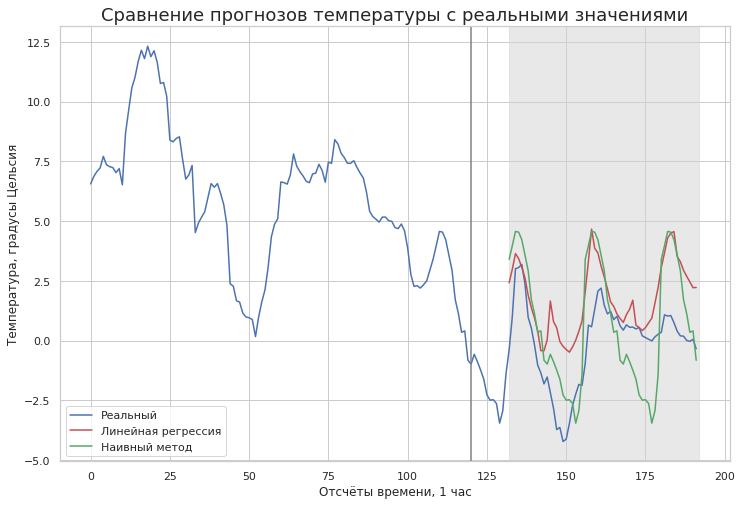

In [103]:
plot_ind = 1600
plt.figure(figsize=(12,8))
plt.plot(range(plot_len_step), plot_samples[plot_ind], "b", label="Реальный")
plt.plot(range((past+future)//6, plot_len_step), predictions_linreg[plot_ind], "r", label="Линейная регрессия")
plt.plot(range((past+future)//6, plot_len_step), predictions_naive[plot_ind], "g", label="Наивный метод")
plt.axvspan(pastfuture_step, plot_len_step, alpha=0.5, color='lightgrey')
plt.axvline(past_step, color='grey')
plt.title('Сравнение прогнозов температуры с реальными значениями', fontsize=18)
plt.xlabel("Отсчёты времени, 1 час")
plt.ylabel("Температура, градусы Цельсия")
plt.grid(True)
plt.legend()
plt.show()

Как видно из этого графика **погода очень непредсказуемая, и основываясь только на прошлом её очень трудно предсказать в будущем**. Зелёная линия просто повторяет прошлоее (наивный метод), а красная (линейная регрессия) пытается что-то предсказать. Наблюдая много графиков, я заметил, что модель может повторять тренд и переодичность реальных значений. Но точный прогноз невозможен.

Сравним прогнозы линейной регрессии с реальными значениями температуры.

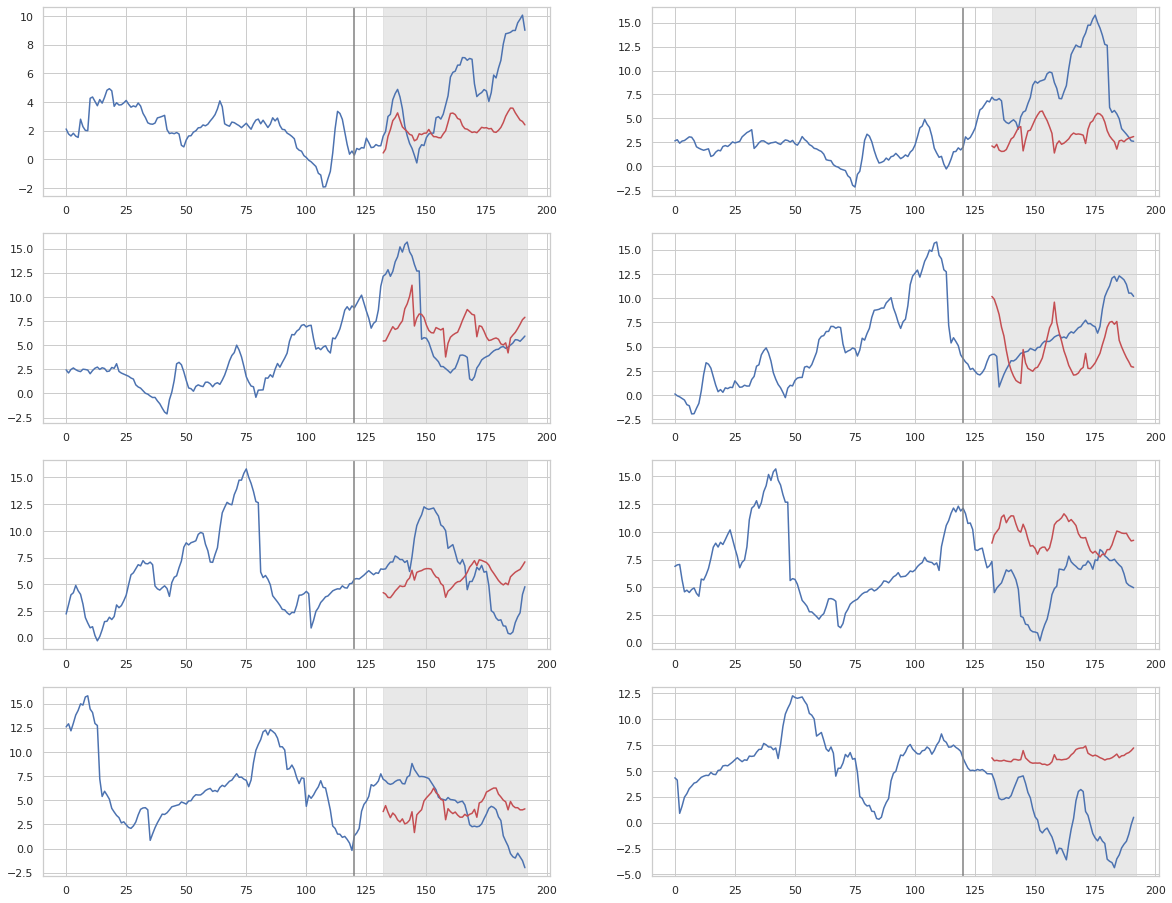

In [105]:
if True:
    plt.figure(figsize=(20, 16))
    plt.subplot(4,2,1)
    plt.plot(range(plot_len_step), plot_samples[0], "b")
    plt.plot(range((past+future)//6, plot_len_step), predictions_linreg[0], "r")
    plt.axvspan(pastfuture_step, plot_len_step, alpha=0.5, color='lightgrey')
    plt.axvline(past_step, color='grey')

    plt.subplot(4,2,2)
    plt.plot(range(plot_len_step), plot_samples[200], "b")
    plt.plot(range((past+future)//6, plot_len_step), predictions_linreg[200], "r")
    plt.axvspan(pastfuture_step, plot_len_step, alpha=0.5, color='lightgrey')
    plt.axvline(past_step, color='grey')

    plt.subplot(4,2,3)
    plt.plot(range(plot_len_step), plot_samples[400], "b")
    plt.plot(range((past+future)//6, plot_len_step), predictions_linreg[400], "r")
    plt.axvspan(pastfuture_step, plot_len_step, alpha=0.5, color='lightgrey')
    plt.axvline(past_step, color='grey')

    plt.subplot(4,2,4)
    plt.plot(range(plot_len_step), plot_samples[600], "b")
    plt.plot(range((past+future)//6, plot_len_step), predictions_linreg[600], "r")
    plt.axvspan(pastfuture_step, plot_len_step, alpha=0.5, color='lightgrey')
    plt.axvline(past_step, color='grey')

    plt.subplot(4,2,5)
    plt.plot(range(plot_len_step), plot_samples[800], "b")
    plt.plot(range((past+future)//6, plot_len_step), predictions_linreg[800], "r")
    plt.axvspan(pastfuture_step, plot_len_step, alpha=0.5, color='lightgrey')
    plt.axvline(past_step, color='grey')

    plt.subplot(4,2,6)
    plt.plot(range(plot_len_step), plot_samples[1000], "b")
    plt.plot(range((past+future)//6, plot_len_step), predictions_linreg[1000], "r")
    plt.axvspan(pastfuture_step, plot_len_step, alpha=0.5, color='lightgrey')
    plt.axvline(past_step, color='grey')

    plt.subplot(4,2,7)
    plt.plot(range(plot_len_step), plot_samples[1200], "b")
    plt.plot(range((past+future)//6, plot_len_step), predictions_linreg[1200], "r")
    plt.axvspan(pastfuture_step, plot_len_step, alpha=0.5, color='lightgrey')
    plt.axvline(past_step, color='grey')

    plt.subplot(4,2,8)
    plt.plot(range(plot_len_step), plot_samples[1400], "b")
    plt.plot(range((past+future)//6, plot_len_step), predictions_linreg[1400], "r")
    plt.axvspan(pastfuture_step, plot_len_step, alpha=0.5, color='lightgrey')
    plt.axvline(past_step, color='grey')

Расчитаем среднее значение по ошибкам предсказаний по каждому часу.

In [113]:
mean_mae_score_linreg = mae_score_linreg.mean(axis=0)
mean_mae_score_naive = mae_score_naive.mean(axis=0)
print(mean_mae_score_linreg.mean(axis=0))
print(mean_mae_score_naive.mean(axis=0))

0.38065203355156363
0.40125772262587994


Построим график среднего значения по каждому часу средней абсолютной ошибки прогнозов за предсказаные 2.5 дня с помощью линейной регрессии и наивного метода.

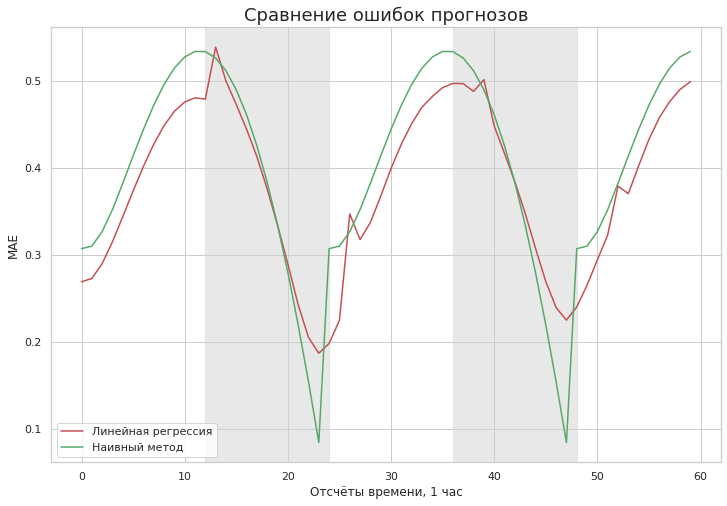

In [107]:
plt.figure(figsize=(12,8))
plt.plot(range(pred_len_step), mean_mae_score_linreg, "r", label="Линейная регрессия")
plt.plot(range(pred_len_step), mean_mae_score_naive, "g", label="Наивный метод")
plt.axvspan(12, 24, alpha=0.5, color='lightgrey')
plt.axvspan(36, 48, alpha=0.5, color='lightgrey')
plt.title('Сравнение ошибок прогнозов', fontsize=18)
plt.xlabel("Отсчёты времени, 1 час")
plt.ylabel("MAE")
plt.grid(True)
plt.legend()
plt.show()

На этом графике очень хорошо видно тот факт, что погода через 24 часа будет очень похожа на ту, которая сейчас, а через 12 часов будет сильнее отличаться. Переодичность суток: день похож на день, ночь на ночь, а день с ночью очень сильно отличаются. Такую же переодичность мы видели на графике автокорреляционной функции за 3 дня. Алгоритмы машинного обучения немного снижают ошибку предсказания, и график ошибки также имеет выраженную суточную переодичность.

**Исследование оптимального количества данных**

Проведём исследование зависимости ошибки прогноза от объёма данных в прошлом. Также будем прогнозировать значение температуры в будущем через 12 часов основываясь на данных за разное количество дней. Количество дней начиная с одного и до 8 с шагом в 6 часов.

In [108]:
%%time

step = 6                # шаг 1 час 
future = 72             # через 12 часов

# задаём диапазон дней в прошлом
days = np.arange(1, 8.25, 0.25, dtype=np.float16)
print('Дни:', days, '\n')

# переводим дни в интервалы замеров
past_days = list(map(lambda x: int(x * 24 * 6), days))

# массив для хранения ошибки
past_mae = np.zeros(days.shape[0])

for j, past in enumerate(past_days):

    # разделяем данные на обучающие и проверочные
    sample_len = int(past/step)
    n_train_samples = train_split - past + 1

    test_space_x = temperature.shape[0] - train_split - future
    test_space_y = temperature.shape[0] - train_split - past - future
    test_split = train_split + future + past
    n_test_samples = test_space_x - past + 1
    n_test_samples = min(n_test_samples, test_space_y)

    # разделяем данные на образцы и метки
    x_train = np.zeros((n_train_samples, sample_len))
    y_train = np.zeros((n_train_samples))

    x_test = np.zeros((n_test_samples, sample_len))
    y_test = np.zeros((n_test_samples)) 

    for i in range(n_train_samples):
        x_train[i] = temperature_norm[i:i+past:step]
        y_train[i] = temperature_norm[i+past+future]

    for i in range(n_test_samples):
        x_test[i] = temperature_norm[train_split+i:train_split+i+past:step]
        y_test[i] = temperature_norm[test_split+i]

    # обучаем модель
    lin_reg = LinearRegression()
    lin_reg.fit(x_train, y_train)

    # расчитываем значение ошибки и сохраняем его
    mae = mean_absolute_error(y_test, lin_reg.predict(x_test)) * temperature_std
    past_mae[j] = mae
    print('h: {0}\td: {1}\ttr: {2}\tts: {3}\tmae: {4:.4f}'.format(past, past/(6*24), n_train_samples, n_test_samples, mae))
    del lin_reg
print('\n')

Дни: [1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25 3.5  3.75 4.   4.25
 4.5  4.75 5.   5.25 5.5  5.75 6.   6.25 6.5  6.75 7.   7.25 7.5  7.75
 8.  ] 

h: 144	d: 1.0	tr: 315712	ts: 104480	mae: 2.3878
h: 180	d: 1.25	tr: 315676	ts: 104444	mae: 2.3782
h: 216	d: 1.5	tr: 315640	ts: 104408	mae: 2.3349
h: 252	d: 1.75	tr: 315604	ts: 104372	mae: 2.3342
h: 288	d: 2.0	tr: 315568	ts: 104336	mae: 2.3289
h: 324	d: 2.25	tr: 315532	ts: 104300	mae: 2.3223
h: 360	d: 2.5	tr: 315496	ts: 104264	mae: 2.2972
h: 396	d: 2.75	tr: 315460	ts: 104228	mae: 2.2973
h: 432	d: 3.0	tr: 315424	ts: 104192	mae: 2.2948
h: 468	d: 3.25	tr: 315388	ts: 104156	mae: 2.2991
h: 504	d: 3.5	tr: 315352	ts: 104120	mae: 2.3034
h: 540	d: 3.75	tr: 315316	ts: 104084	mae: 2.3039
h: 576	d: 4.0	tr: 315280	ts: 104048	mae: 2.3028
h: 612	d: 4.25	tr: 315244	ts: 104012	mae: 2.3056
h: 648	d: 4.5	tr: 315208	ts: 103976	mae: 2.3020
h: 684	d: 4.75	tr: 315172	ts: 103940	mae: 2.3025
h: 720	d: 5.0	tr: 315136	ts: 103904	mae: 2.3017
h: 756	d: 5.25	tr: 3

Построим график зависимости ошибки предсказания от объёма обучающих данных.

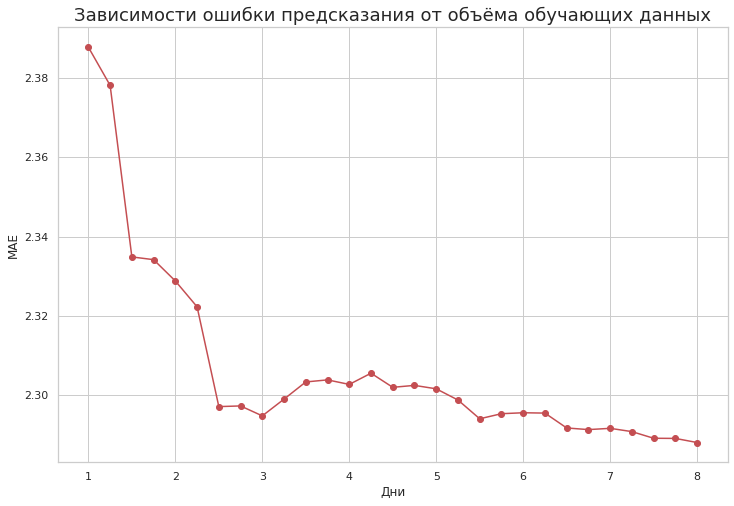

In [110]:
plt.figure(figsize=(12,8))
plt.plot(days, past_mae, "ro")
plt.plot(days, past_mae, "r")
plt.title('Зависимости ошибки предсказания от объёма обучающих данных', fontsize=18)
plt.xlabel("Дни")
plt.ylabel("MAE")
plt.grid(True)
plt.show()

Как мы видим, значение ошибки закономерно падает с увеличением объёма обучающих данных. Однако можно заметить небольшую впадину на отрезке 2.5-3 дня. Исходя из этого, оптимальным значением объёма данных для обучения будет 3 дня. Ранее мы обучали модели на 5 днях просто выбрав такое значение. Если взять оптимальное значение объёма данных в прошлом равное трём дням, то ошибка предсказания совсем немного улучшиться 2.2948 degC.

Теперь исследуем зависимость ошибки предсказания от того, как далеко в будущее мы хотим сделать прогноз.

In [111]:
%%time

step = 6                # шаг 1 час 
past = 432              # 3 дня в прошлом

# задаём диапазон дней
f_days = np.arange(0.25, 5.25, 0.25, dtype=np.float16)
print('Дни:', days, '\n')

# переводим дни в интервалы замеров
future_days = list(map(lambda x: int(x * 24 * 6), f_days))

# массив для хранения ошибки
future_mae = np.zeros(f_days.shape[0])

for j, future in enumerate(future_days):
    # разделяем данные на обучающие и проверочные
    sample_len = int(past/step)
    n_train_samples = train_split - past + 1

    test_space_x = temperature.shape[0] - train_split - future
    test_space_y = temperature.shape[0] - train_split - past - future
    test_split = train_split + future + past
    n_test_samples = test_space_x - past + 1
    n_test_samples = min(n_test_samples, test_space_y)
    
    # разделяем данные на образцы и метки
    x_train = np.zeros((n_train_samples, sample_len))
    y_train = np.zeros((n_train_samples))

    x_test = np.zeros((n_test_samples, sample_len))
    y_test = np.zeros((n_test_samples)) 

    for i in range(n_train_samples):
        x_train[i] = temperature_norm[i:i+past:step]
        y_train[i] = temperature_norm[i+past+future]

    for i in range(n_test_samples):
        x_test[i] = temperature_norm[train_split+i:train_split+i+past:step]
        y_test[i] = temperature_norm[test_split+i]

    # обучаем модель
    lin_reg = LinearRegression()
    lin_reg.fit(x_train, y_train)
    
    # расчитываем значение ошибки и сохраняем его
    mae = mean_absolute_error(y_test, lin_reg.predict(x_test)) * temperature_std
    future_mae[j] = mae
    print('f: {0}\td: {1}\ttr: {2}\tts: {3}\tmae: {4:.4f}'.format(future, future/(6*24), n_train_samples, n_test_samples, mae))
    del lin_reg
print('\n')

Дни: [1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25 3.5  3.75 4.   4.25
 4.5  4.75 5.   5.25 5.5  5.75 6.   6.25 6.5  6.75 7.   7.25 7.5  7.75
 8.  ] 

f: 36	d: 0.25	tr: 315424	ts: 104228	mae: 1.8926
f: 72	d: 0.5	tr: 315424	ts: 104192	mae: 2.2948
f: 108	d: 0.75	tr: 315424	ts: 104156	mae: 2.4465
f: 144	d: 1.0	tr: 315424	ts: 104120	mae: 2.6271
f: 180	d: 1.25	tr: 315424	ts: 104084	mae: 2.9827
f: 216	d: 1.5	tr: 315424	ts: 104048	mae: 3.1670
f: 252	d: 1.75	tr: 315424	ts: 104012	mae: 3.2452
f: 288	d: 2.0	tr: 315424	ts: 103976	mae: 3.3059
f: 324	d: 2.25	tr: 315424	ts: 103940	mae: 3.4394
f: 360	d: 2.5	tr: 315424	ts: 103904	mae: 3.5168
f: 396	d: 2.75	tr: 315424	ts: 103868	mae: 3.5480
f: 432	d: 3.0	tr: 315424	ts: 103832	mae: 3.5646
f: 468	d: 3.25	tr: 315424	ts: 103796	mae: 3.6928
f: 504	d: 3.5	tr: 315424	ts: 103760	mae: 3.7750
f: 540	d: 3.75	tr: 315424	ts: 103724	mae: 3.8053
f: 576	d: 4.0	tr: 315424	ts: 103688	mae: 3.8222
f: 612	d: 4.25	tr: 315424	ts: 103652	mae: 3.9134
f: 648	d: 4.5	tr: 315

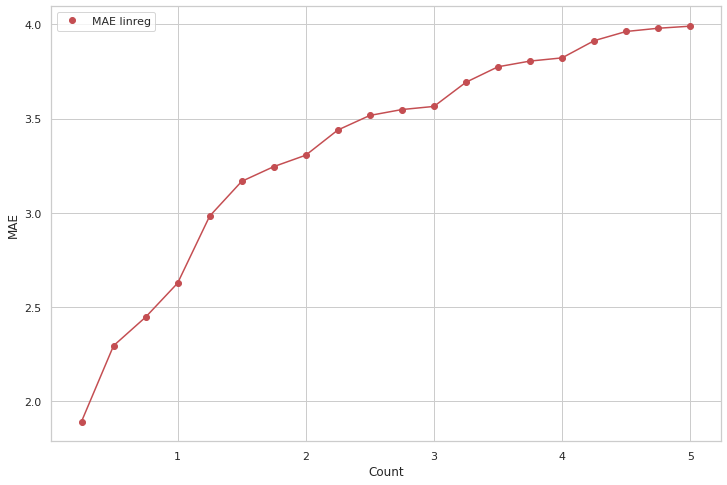

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(days, future_mae, "bo")
plt.plot(days, future_mae, "b")
plt.title('Зависимости ошибки предсказания как далеко пронозируем будущее', fontsize=18)
plt.xlabel("Дни")
plt.ylabel("MAE")
plt.grid(True)
plt.show()

Как и ожидалось, значение ошибки увеличивается с увеличением "расстояния" прогноза в будущее.

**Вывод**

Принимая во внимание всё вышесказанное, можно с уверенностью сказать, что точно предсказать значение температуры в будущем, основываясь только на информации о прошлом, невозможно. И значительно превзойти наивный метод предсказания очень сложно. Возможно, генерация новых фичей, например с помощью библиотеки TSfresh, поможет улучшить наш прогноз. Однако погода, и, в частности, температура имееют очень непредсказуемый характер. Для их точного предсказания нужно знать и учитывать очень много дополнителных параметров.